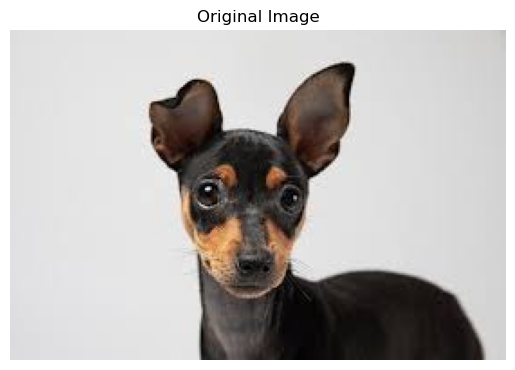

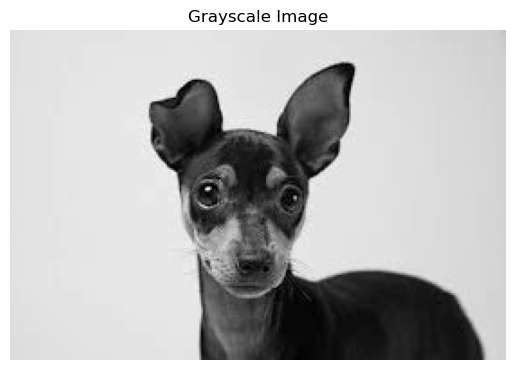

Original Image - Min Pixel Value: 0, Max Pixel Value: 255
Grayscale Image - Min Pixel Value: 0, Max Pixel Value: 254


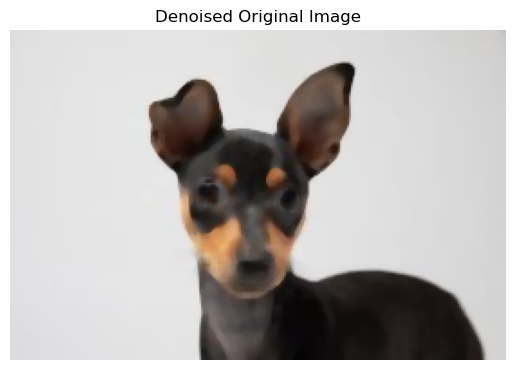

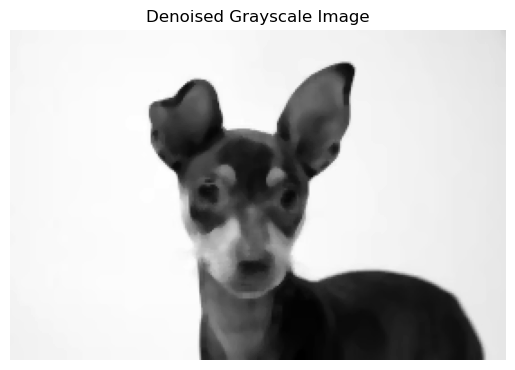

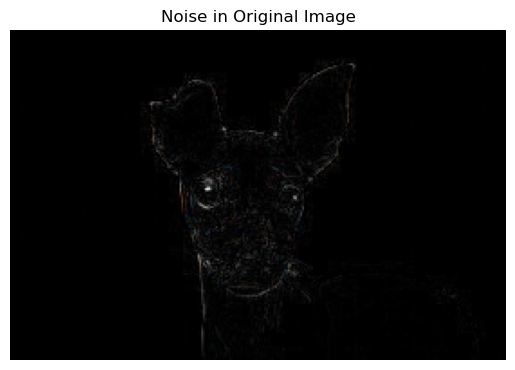

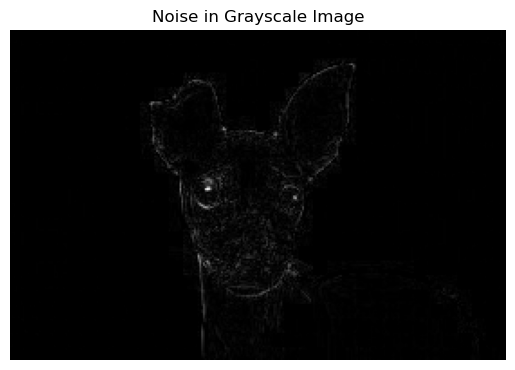

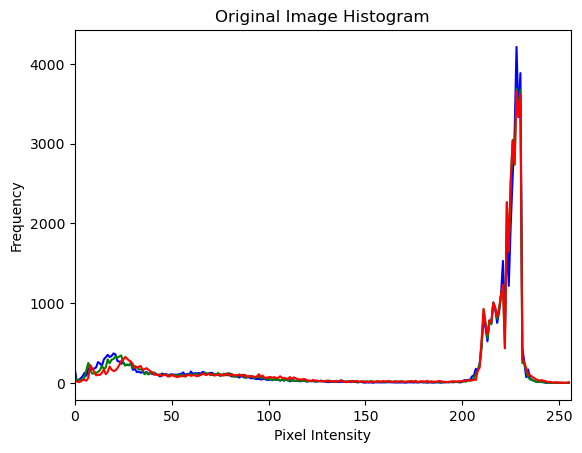

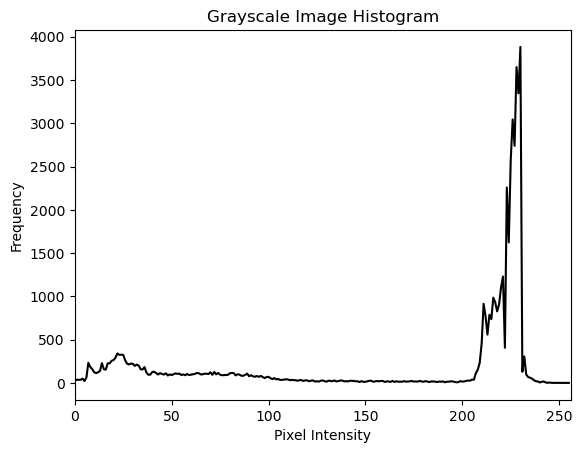

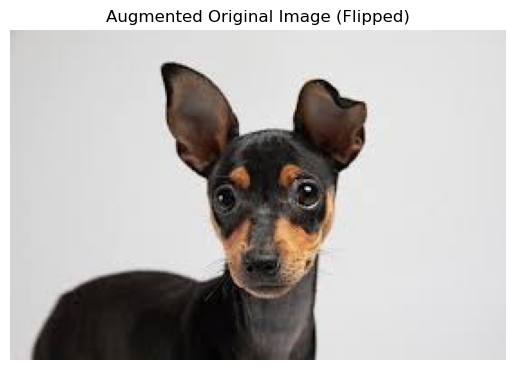

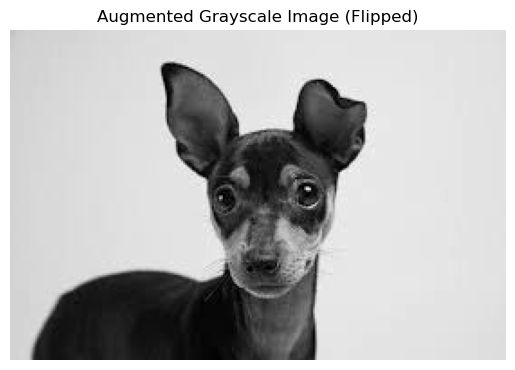

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title, cmap=None):
    if len(image.shape) == 2:  # Grayscale image
        plt.imshow(image, cmap=cmap if cmap else 'gray')
    else:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

def find_min_max(image):
    # Find the minimum and maximum pixel values in the image
    min_val = np.min(image)
    max_val = np.max(image)
    return min_val, max_val

def denoise_image(image):
    # Apply median blur to denoise the image
    denoised_image = cv2.medianBlur(image, 5)
    return denoised_image

def calculate_change(original, denoised):
    # Calculate the absolute difference between the original and denoised images
    difference = cv2.absdiff(original, denoised)
    return difference

def plot_histogram(image, title, color=None):
    plt.figure()
    if len(image.shape) == 2:  # Grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
    else:  # Color image
        channels = ('b', 'g', 'r')
        for i, col in enumerate(channels):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=col)
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 256])
    plt.show()

def apply_augmentation(image):
    # Apply augmentation (flipping the image horizontally)
    augmented_image = cv2.flip(image, 1)
    return augmented_image

def process_image(image_path):
    # Step 1: Load the image
    image = cv2.imread(image_path)

    # Step 2: Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Display the original and grayscale images
    display_image(image, "Original Image")
    display_image(gray_image, "Grayscale Image", cmap='gray')

    # Step 4: Find minimum and maximum pixel values for both images
    min_val, max_val = find_min_max(image)
    gray_min_val, gray_max_val = find_min_max(gray_image)
    print(f"Original Image - Min Pixel Value: {min_val}, Max Pixel Value: {max_val}")
    print(f"Grayscale Image - Min Pixel Value: {gray_min_val}, Max Pixel Value: {gray_max_val}")

    # Step 5: Apply denoising and display denoised images
    denoised_image = denoise_image(image)
    denoised_gray_image = denoise_image(gray_image)
    display_image(denoised_image, "Denoised Original Image")
    display_image(denoised_gray_image, "Denoised Grayscale Image", cmap='gray')

    # Step 6: Calculate and display change (noise removed)
    difference = calculate_change(image, denoised_image)
    gray_difference = calculate_change(gray_image, denoised_gray_image)
    display_image(difference, "Noise in Original Image")
    display_image(gray_difference, "Noise in Grayscale Image", cmap='gray')

    # Step 7: Find and plot histograms for both original and grayscale images
    plot_histogram(image, "Original Image Histogram")
    plot_histogram(gray_image, "Grayscale Image Histogram")

    # Step 8: Apply augmentation (flipping) to both images and display them
    augmented_image = apply_augmentation(image)
    augmented_gray_image = apply_augmentation(gray_image)
    display_image(augmented_image, "Augmented Original Image (Flipped)")
    display_image(augmented_gray_image, "Augmented Grayscale Image (Flipped)", cmap='gray')

# Example usage
image_path = 'doggy.jfif'  # Replace with your image path
process_image(image_path)
